In [1]:
from os import listdir
from os.path import isfile, join

import seaborn as sns
import matplotlib.pyplot as plt
from utils.rodents_routine import _sigmoid_scalar, params_to_P_scalar, params_to_w_scalar, params_to_heter_scalar

params_to_J_scalar = lambda x: _sigmoid_scalar(x, 1, 126.5)
import pandas as pd

In [2]:
plt.rcParams.update({'font.size': 22})
sns.set(font_scale=2.4)

In [3]:
path = r"/Users/paopao_ch/Documents/projects/v1_modelling/results/xNESMethodVal10000"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [4]:
data = []
with open(f"/Users/paopao_ch/Documents/projects/v1_modelling/results/xNESMethodVal10000/results.log", 'r') as f:
    f_line = []
    for line in f:
        f_line.append(line)

with open(f"/Users/paopao_ch/Documents/projects/v1_modelling/results/xNESMethodVal10000/loss.log", 'r') as f:
    for line1, line2 in zip(f, f_line):
        params = eval(line2)
        loss = eval(line1)

        if loss < 0.01:
            datum = {"$J_{EE}$": params_to_J_scalar(params[0]) / (8000 ** 0.5), 
                     "$J_{EI}$": params_to_J_scalar(params[1]) / (2000 ** 0.5), 
                     "$J_{IE}$": params_to_J_scalar(params[2]) / (8000 ** 0.5),
                     "$J_{II}$": params_to_J_scalar(params[3]) / (2000 ** 0.5),
                     "$P_{EE}$": params_to_P_scalar(params[4]),
                     "$P_{EI}$": params_to_P_scalar(params[5]),
                     "$P_{IE}$": params_to_P_scalar(params[6]),
                     "$P_{II}$": params_to_P_scalar(params[7]),
                     "$w_{EE}$": params_to_w_scalar(params[8]),
                     "$w_{EI}$": params_to_w_scalar(params[9]),
                     "$w_{IE}$": params_to_w_scalar(params[10]),
                     "$w_{II}$": params_to_w_scalar(params[11]),
                     "$q_{ff}$": params_to_heter_scalar(params[12]),
                         "loss": loss}
            
            data.append(datum)

In [5]:
df = pd.DataFrame(data)
print(len(df))
for datum in data[:5]:
    print(datum)
df.head()

16
{'$J_{EE}$': 0.36798499740922536, '$J_{EI}$': 0.09909558229775169, '$J_{IE}$': 1.384789008329531, '$J_{II}$': 2.7920305239447707, '$P_{EE}$': 0.0027798191110209062, '$P_{EI}$': 0.26649535196101254, '$P_{IE}$': 0.38153822696460093, '$P_{II}$': 0.5927027828439057, '$w_{EE}$': 12.31808860225077, '$w_{EI}$': 141.95078621002807, '$w_{IE}$': 165.00831290416937, '$w_{II}$': 166.85885344509776, '$q_{ff}$': 0.11567910281505911, 'loss': 0.0018472387455403805}
{'$J_{EE}$': 0.04335680734693971, '$J_{EI}$': 2.7702792561367393, '$J_{IE}$': 0.31352560039468524, '$J_{II}$': 2.560062597786643, '$P_{EE}$': 0.5933357301734195, '$P_{EI}$': 0.5978545538985466, '$P_{IE}$': 0.17344262870353447, '$P_{II}$': 0.08779652776799564, '$w_{EE}$': 53.171996096517326, '$w_{EI}$': 3.696212231100529, '$w_{IE}$': 167.206590960814, '$w_{II}$': 71.31272238250364, '$q_{ff}$': 0.7917489440327965, 'loss': 0.0021017505787312984}
{'$J_{EE}$': 0.04306775364708372, '$J_{EI}$': 2.785382766204156, '$J_{IE}$': 0.9803047622361554,

,$J_{EE}$,$J_{EI}$,$J_{IE}$,$J_{II}$,$P_{EE}$,$P_{EI}$,$P_{IE}$,$P_{II}$,$w_{EE}$,$w_{EI}$,$w_{IE}$,$w_{II}$,$q_{ff}$,loss
0,0.367985,0.099096,1.384789,2.792031,0.002780,0.266495,0.381538,0.592703,12.318089,141.950786,165.008313,166.858853,0.115679,0.001847
1,0.043357,2.770279,0.313526,2.560063,0.593336,0.597855,0.173443,0.087797,53.171996,3.696212,167.206591,71.312722,0.791749,0.002102
2,0.043068,2.785383,0.980305,2.607150,0.532682,0.058972,0.273906,0.596936,6.049472,49.070535,164.658331,35.438677,0.944333,0.005249
3,0.011542,0.174393,0.214684,0.582238,0.531289,0.479578,0.507148,0.533792,130.021251,153.676777,63.901341,121.196032,0.842029,0.002969
4,0.023120,0.050727,0.011847,2.610435,0.012073,0.588477,0.549913,0.013541,32.467737,162.509838,29.268212,64.603725,0.310090,0.001321


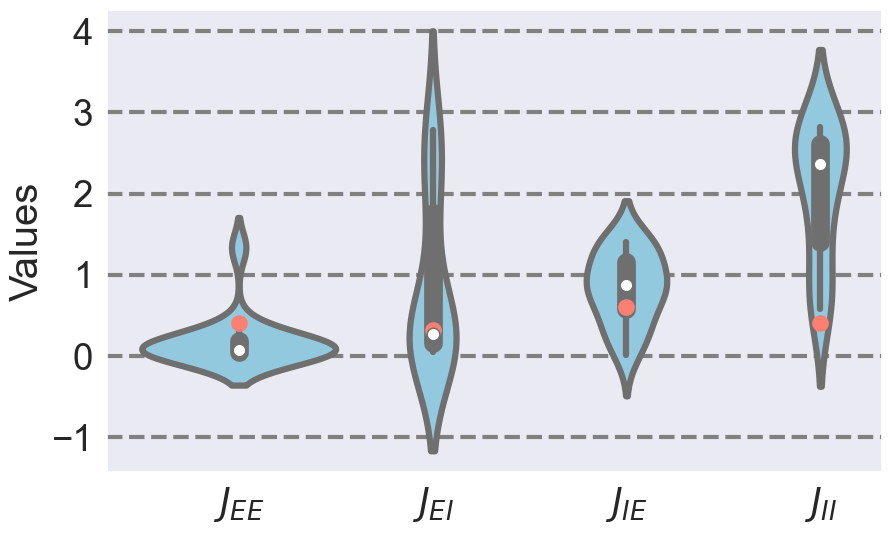

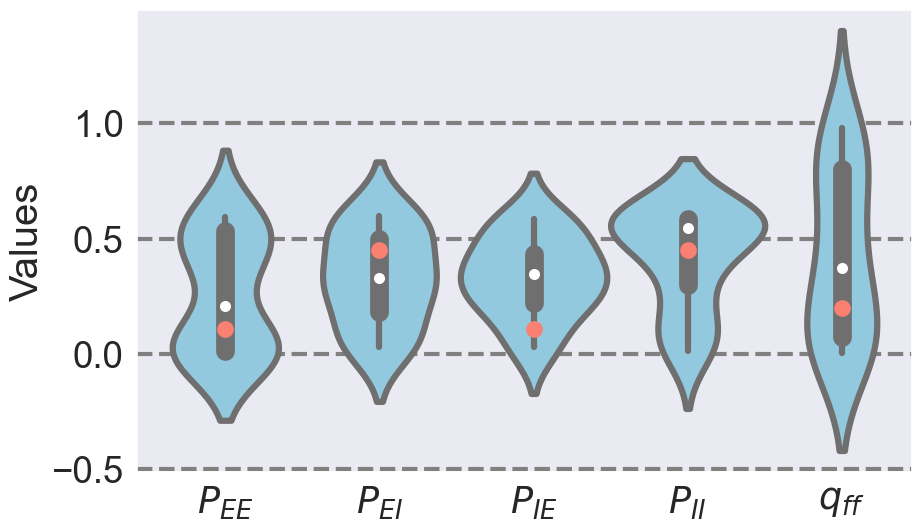

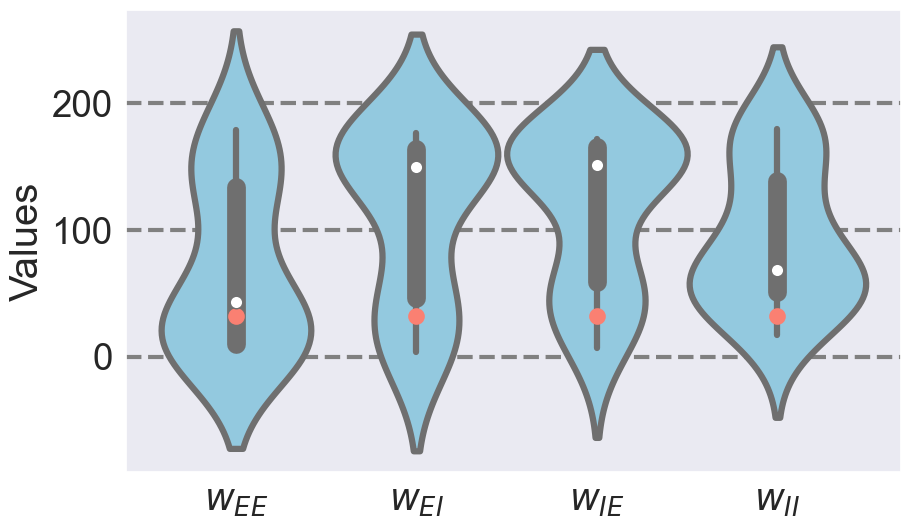

In [6]:
width = 1
linewidth = 4.5
linewidth_grid = 3

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$J_{EE}$", "$J_{EI}$", "$J_{IE}$", "$J_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [35.78 / (8000 ** 0.5), 14.31 / (2000 ** 0.5), 53.67 / (8000 ** 0.5), 17.89 / (2000 ** 0.5)]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$P_{EE}$", "$P_{EI}$", "$P_{IE}$", "$P_{II}$", "$q_{ff}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45, 0.2]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
# plt.ylim(-0.3,1)
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["$w_{EE}$", "$w_{EI}$", "$w_{IE}$", "$w_{II}$"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=linewidth_grid, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

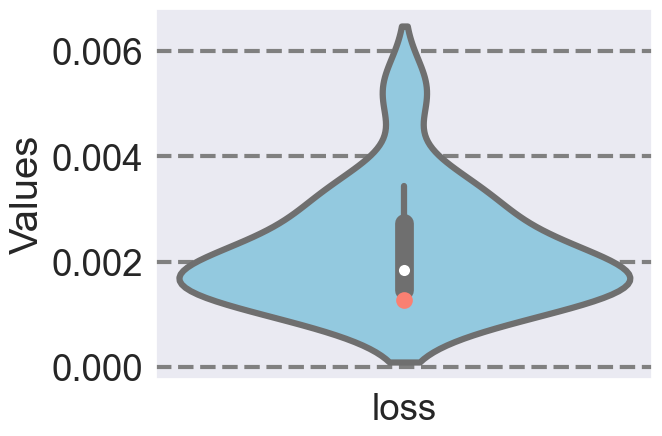

In [7]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.001272845532]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=20, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=linewidth_grid)
plt.xlabel('')
plt.ylabel('Values')
plt.show()